In [34]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
#from pycaret.classification import *
from pycaret.regression import *
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
df = pd.read_csv('data.csv')

In [36]:
#Convert a collection of text documents to a matrix of token counts.
#implements both tokenization and occurrence counting in a single class:
tf_vectorizer = CountVectorizer()

In [37]:
features = tf_vectorizer.fit_transform(df['summary'].apply(lambda features : np.str_(features)))

In [38]:
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [ ]:
#print("Vocabulary: ", tf_vectorizer.vocabulary_)

In [39]:
features_df.head(5)

,00,101,14,1864,1930s,1st,2003,2008,21th,2weeks,...,yay,yet,yiddish,york,you,young,your,yourself,yuk,zardoz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
new_df = pd.concat([features_df,df['actual_ratings']],axis=1)
new_df.head(5)

,00,101,14,1864,1930s,1st,2003,2008,21th,2weeks,...,yet,yiddish,york,you,young,your,yourself,yuk,zardoz,actual_ratings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [44]:
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [45]:
numerical_features = list(features_df.columns)
#numerical_features

In [46]:
#the setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

exp_regr = setup(data = new_train_df, target = 'actual_ratings',numeric_features=numerical_features,session_id=123) 

,Description,Value
0,session_id,123
1,Target,actual_ratings
2,Original Data,"(750, 1298)"
3,Missing Values,False
4,Numeric Features,1297
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(524, 986)"


In [47]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.8303,1.1898,1.0797,0.1535,0.2725,0.3406,0.4710
gbr,Gradient Boosting Regressor,0.8598,1.2644,1.1110,0.1069,0.2828,0.3604,0.1700
ridge,Ridge Regression,0.8407,1.2757,1.1180,0.0917,0.2826,0.3404,0.0220
lightgbm,Light Gradient Boosting Machine,0.8939,1.3488,1.1534,0.0407,0.2932,0.3777,0.1840
knn,K Neighbors Regressor,0.8159,1.3446,1.1497,0.0374,0.2932,0.3738,0.0440
ada,AdaBoost Regressor,0.9658,1.3841,1.1710,0.0127,0.2936,0.3872,0.0440
en,Elastic Net,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.0220
llar,Lasso Least Angle Regression,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.5850
lasso,Lasso Regression,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.0240
dummy,Dummy Regressor,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.0210


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [49]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8135,1.0038,1.0019,0.2890,0.2406,0.2903
1,0.6894,0.9131,0.9555,0.1479,0.2350,0.2528
2,1.0240,1.8450,1.3583,-0.0295,0.3614,0.4961
3,0.6652,0.7524,0.8674,0.2024,0.2014,0.2103
4,0.7945,1.0092,1.0046,0.2901,0.2508,0.2994
5,0.7716,1.0371,1.0184,0.3252,0.2518,0.2944
6,1.0552,1.8323,1.3536,-0.3107,0.3467,0.4890
7,0.8727,1.2722,1.1279,0.2132,0.2922,0.3769
8,0.8069,0.9809,0.9904,0.1306,0.2450,0.3034


In [50]:
br

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [51]:

top_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.8303,1.1898,1.0797,0.1535,0.2725,0.3406,0.6170
gbr,Gradient Boosting Regressor,0.8598,1.2644,1.1110,0.1069,0.2828,0.3604,0.2080
ridge,Ridge Regression,0.8407,1.2757,1.1180,0.0917,0.2826,0.3404,0.0220
lightgbm,Light Gradient Boosting Machine,0.8939,1.3488,1.1534,0.0407,0.2932,0.3777,0.2560
knn,K Neighbors Regressor,0.8159,1.3446,1.1497,0.0374,0.2932,0.3738,0.0490
ada,AdaBoost Regressor,0.9658,1.3841,1.1710,0.0127,0.2936,0.3872,0.0480
en,Elastic Net,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.0210
llar,Lasso Least Angle Regression,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.8320
lasso,Lasso Regression,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.0200
dummy,Dummy Regressor,0.9536,1.4387,1.1943,-0.0264,0.3028,0.4043,0.0220


In [52]:
top_model

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [53]:
tuned_model = tune_model(top_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8137,1.0037,1.0018,0.2891,0.2406,0.2905
1,0.6893,0.9130,0.9555,0.1480,0.2350,0.2528
2,1.0239,1.8443,1.3581,-0.0291,0.3613,0.4961
3,0.6652,0.7523,0.8674,0.2025,0.2014,0.2103
4,0.7945,1.0091,1.0045,0.2902,0.2508,0.2995
5,0.7716,1.0369,1.0183,0.3254,0.2518,0.2944
6,1.0551,1.8320,1.3535,-0.3105,0.3467,0.4890
7,0.8728,1.2721,1.1279,0.2132,0.2922,0.3770
8,0.8069,0.9809,0.9904,0.1307,0.2450,0.3034


In [61]:
#plot_model(tuned_model)

In [60]:
#plot_model(tuned_model, plot = 'error')

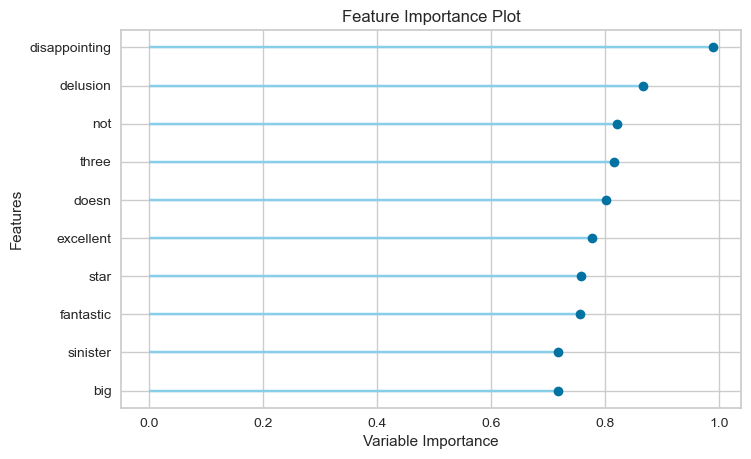

In [56]:
plot_model(tuned_model, plot='feature')

In [62]:
#evaluate_model(tuned_model);

In [58]:
predict_model(tuned_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.8091,1.1673,1.0804,0.2239,0.2803,0.3491


In [59]:
unseen_predictions = predict_model(tuned_model, data=new_test_df)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.7843,1.0601,1.0296,0.0905,0.2467,0.2793


,00,101,14,1864,1930s,1st,2003,2008,21th,2weeks,...,yiddish,york,you,young,your,yourself,yuk,zardoz,actual_ratings,Label
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4.367271
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3.394257
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,3.801406
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4.712539
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3.394505


In [63]:
save_model(tuned_model,"deployment_review_to_ratings_04082022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['00', '101', '14',
                                                           '1864', '1930s',
                                                           '1st', '2003', '2008',
                                                           '21th', '2weeks',
                                                           '30', '592', '85',
                                                           '99', 'ab',
                                                           'abagnale',
                                                           'abbreviated',
                                                           'about', 'above',
                                           